In [1]:
import os
import sys
sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/Snail_rop/"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/Snail_rop/Snail4_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail5_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail3_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail1_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail2_NoBact.mm']
(4,) [6840   64   64    5]
(4,) [4649   64   64    5]
(4,) [7729   64   64    5]
(4,) [7854   64   64    5]
(4,) [8397   64   64    5]
35469


dict_keys(['Snail4_NoBact.mm', 'Snail5_NoBact.mm', 'Snail3_NoBact.mm', 'Snail1_NoBact.mm', 'Snail2_NoBact.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

6840
4649
7729
7854
8397


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 1), dtype=float32) (?, 32, 32, 1)


/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Tensor("latent_space/BiasAdd:0", shape=(?, 128), dtype=float32)
isize:  4 32
Tensor("decoder_sigmoid:0", shape=(?, 32, 32, 1), dtype=float32)
35469 277 128
34957 512
Iteration:  0 Loss:  709.8981
Test Loss 709.7942
Iteration:  0 Loss:  709.8981
Test Loss 709.7942


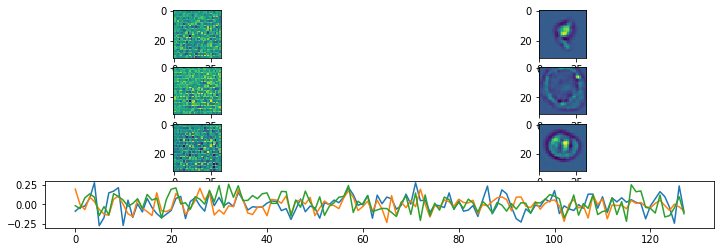

Iteration:  100 Loss:  680.6066
Test Loss 678.2444
Iteration:  200 Loss:  675.48834
Test Loss 675.1051
Iteration:  300 Loss:  673.3158
Test Loss 672.5917
Iteration:  400 Loss:  675.92914
Test Loss 670.08563
Iteration:  500 Loss:  667.3926
Test Loss 668.4075
Iteration:  600 Loss:  663.83405
Test Loss 666.24225
Iteration:  700 Loss:  664.46075
Test Loss 665.1578
Iteration:  800 Loss:  662.72266
Test Loss 663.92896
Iteration:  900 Loss:  659.24963
Test Loss 662.9938
Iteration:  1000 Loss:  652.895
Test Loss 662.3027
Iteration:  1000 Loss:  652.895
Test Loss 662.3027


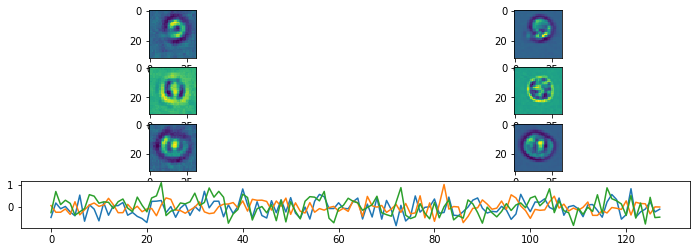

Iteration:  1100 Loss:  655.6803
Test Loss 661.7657
Iteration:  1200 Loss:  652.4502
Test Loss 661.04987
Iteration:  1300 Loss:  652.37036
Test Loss 660.58276
Iteration:  1400 Loss:  660.4059
Test Loss 660.30597
Iteration:  1500 Loss:  660.3955
Test Loss 659.7698
Iteration:  1600 Loss:  663.4889
Test Loss 659.385
Iteration:  1700 Loss:  656.6421
Test Loss 659.10657
Iteration:  1800 Loss:  651.9518
Test Loss 658.7917
Iteration:  1900 Loss:  658.0901
Test Loss 658.5005
Iteration:  2000 Loss:  655.34766
Test Loss 658.57184
Iteration:  2000 Loss:  655.34766
Test Loss 658.57184


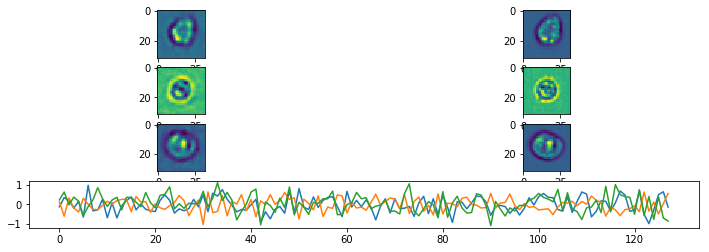

Iteration:  2100 Loss:  653.82434
Test Loss 658.3558
Iteration:  2200 Loss:  654.6359
Test Loss 657.8549
Iteration:  2300 Loss:  656.9986
Test Loss 657.65454
Iteration:  2400 Loss:  657.1238
Test Loss 657.4673
Iteration:  2500 Loss:  657.82135
Test Loss 657.37866
Iteration:  2600 Loss:  655.6555
Test Loss 657.22546
Iteration:  2700 Loss:  657.78864
Test Loss 657.0039
Iteration:  2800 Loss:  654.62305
Test Loss 656.9161
Iteration:  2900 Loss:  660.00146
Test Loss 656.7227
Iteration:  3000 Loss:  650.3857
Test Loss 656.63464
Iteration:  3000 Loss:  650.3857
Test Loss 656.63464


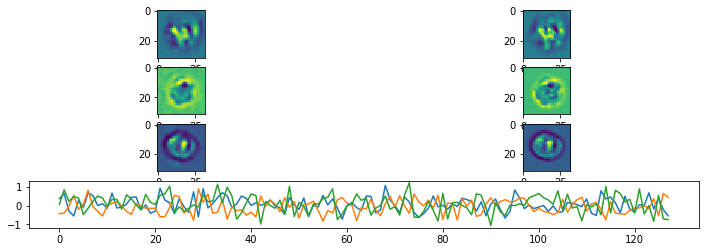

Iteration:  3100 Loss:  655.42084
Test Loss 656.5603
Iteration:  3200 Loss:  655.35254
Test Loss 656.3701
Iteration:  3300 Loss:  650.2234
Test Loss 656.2305
Iteration:  3400 Loss:  656.529
Test Loss 656.1264
Iteration:  3500 Loss:  652.2855
Test Loss 656.0389
Iteration:  3600 Loss:  658.79834
Test Loss 655.9031
Iteration:  3700 Loss:  650.66095
Test Loss 655.7643
Iteration:  3800 Loss:  656.403
Test Loss 655.6408
Iteration:  3900 Loss:  652.279
Test Loss 655.5622
Iteration:  4000 Loss:  656.84515
Test Loss 655.5416
Iteration:  4000 Loss:  656.84515
Test Loss 655.5416


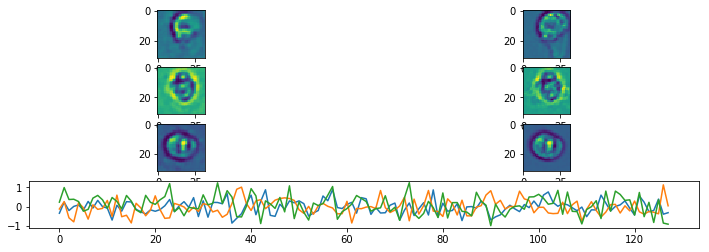

Iteration:  4100 Loss:  661.5782
Test Loss 655.4013
Iteration:  4200 Loss:  653.8609
Test Loss 655.4096
Iteration:  4300 Loss:  655.68164
Test Loss 655.2642
Iteration:  4400 Loss:  654.0737
Test Loss 655.1919
Iteration:  4500 Loss:  659.07983
Test Loss 655.0723
Iteration:  4600 Loss:  650.13293
Test Loss 655.10077
Iteration:  4700 Loss:  659.9509
Test Loss 654.96375
Iteration:  4800 Loss:  647.55835
Test Loss 654.9032
Iteration:  4900 Loss:  650.09283
Test Loss 654.81323
Iteration:  5000 Loss:  654.47955
Test Loss 654.9098
Iteration:  5000 Loss:  654.47955
Test Loss 654.9098


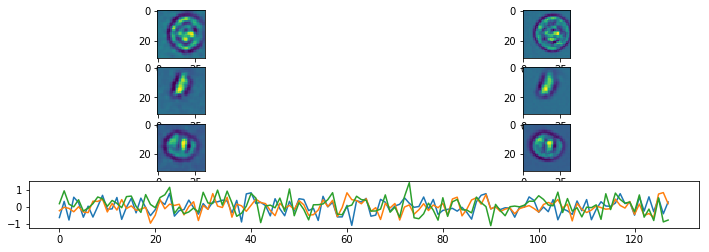

Iteration:  5100 Loss:  658.7205
Test Loss 654.71313
Iteration:  5200 Loss:  651.08624
Test Loss 654.65106
Iteration:  5300 Loss:  654.61597
Test Loss 654.5644
Iteration:  5400 Loss:  657.78906
Test Loss 654.5092
Iteration:  5500 Loss:  653.23376
Test Loss 654.4833
Iteration:  5600 Loss:  648.68774
Test Loss 654.4369
Iteration:  5700 Loss:  652.881
Test Loss 654.37445
Iteration:  5800 Loss:  655.5054
Test Loss 654.3136
Iteration:  5900 Loss:  657.6914
Test Loss 654.29596
Iteration:  6000 Loss:  652.59644
Test Loss 654.2776
Iteration:  6000 Loss:  652.59644
Test Loss 654.2776


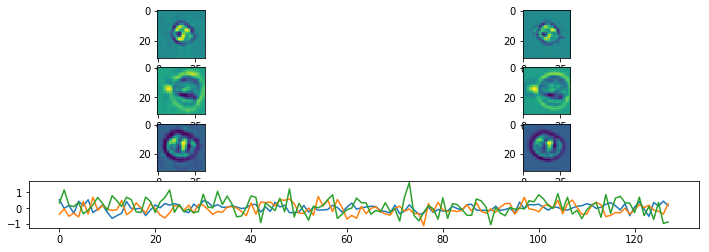

Iteration:  6100 Loss:  653.2413
Test Loss 654.29016
Iteration:  6200 Loss:  656.63184
Test Loss 654.2062
Iteration:  6300 Loss:  654.2126
Test Loss 654.1917
Iteration:  6400 Loss:  660.02124
Test Loss 654.1036
Iteration:  6500 Loss:  648.08386
Test Loss 654.0553
Iteration:  6600 Loss:  653.2046
Test Loss 654.0317
Iteration:  6700 Loss:  655.1642
Test Loss 653.9719
Iteration:  6800 Loss:  655.93567
Test Loss 653.9653
Iteration:  6900 Loss:  656.35626
Test Loss 654.01227
Iteration:  7000 Loss:  650.8031
Test Loss 653.8697
Iteration:  7000 Loss:  650.8031
Test Loss 653.8697


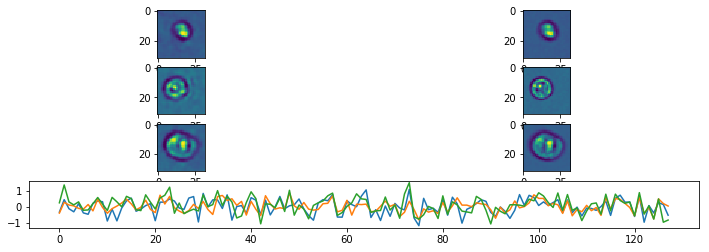

Iteration:  7100 Loss:  654.53033
Test Loss 653.8251
Iteration:  7200 Loss:  657.6688
Test Loss 653.8285
Iteration:  7300 Loss:  657.6587
Test Loss 653.86664
Iteration:  7400 Loss:  652.6747
Test Loss 653.8599
Iteration:  7500 Loss:  650.3532
Test Loss 653.7314
Iteration:  7600 Loss:  650.87384
Test Loss 653.77893
Iteration:  7700 Loss:  653.2479
Test Loss 653.6926
Iteration:  7800 Loss:  649.5869
Test Loss 653.6602
Iteration:  7900 Loss:  654.0465
Test Loss 653.61096
Iteration:  8000 Loss:  654.75757
Test Loss 653.6119
Iteration:  8000 Loss:  654.75757
Test Loss 653.6119


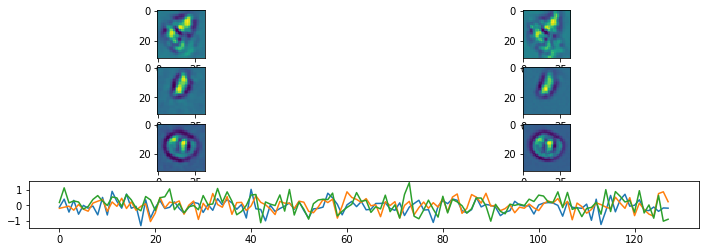

Iteration:  8100 Loss:  652.88684
Test Loss 653.6045
Iteration:  8200 Loss:  656.60535
Test Loss 653.5702
Iteration:  8300 Loss:  654.8955
Test Loss 653.5187
Iteration:  8400 Loss:  651.3702
Test Loss 653.602
Iteration:  8500 Loss:  656.22455
Test Loss 653.50024
Iteration:  8600 Loss:  648.876
Test Loss 653.569
Iteration:  8700 Loss:  655.0151
Test Loss 653.4328
Iteration:  8800 Loss:  653.01447
Test Loss 653.4313
Iteration:  8900 Loss:  649.8586
Test Loss 653.48865
Iteration:  9000 Loss:  656.64075
Test Loss 653.3856
Iteration:  9000 Loss:  656.64075
Test Loss 653.3856


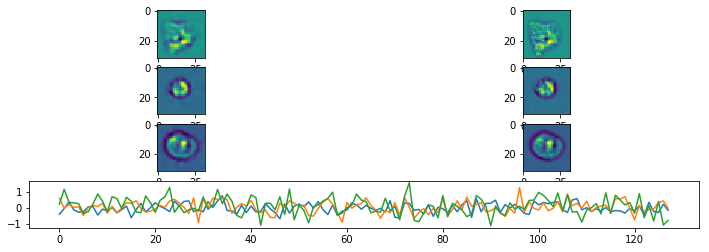

Iteration:  9100 Loss:  647.74475
Test Loss 653.4035
Iteration:  9200 Loss:  654.80035
Test Loss 653.3578
Iteration:  9300 Loss:  653.48016
Test Loss 653.33075
Iteration:  9400 Loss:  655.58044
Test Loss 653.29614
Iteration:  9500 Loss:  651.8534
Test Loss 653.2716
Iteration:  9600 Loss:  650.11914
Test Loss 653.33594
Iteration:  9700 Loss:  654.69104
Test Loss 653.2637
Iteration:  9800 Loss:  653.1966
Test Loss 653.2587
Iteration:  9900 Loss:  649.60657
Test Loss 653.2639
Iteration:  10000 Loss:  657.30835
Test Loss 653.2436
Iteration:  10000 Loss:  657.30835
Test Loss 653.2436


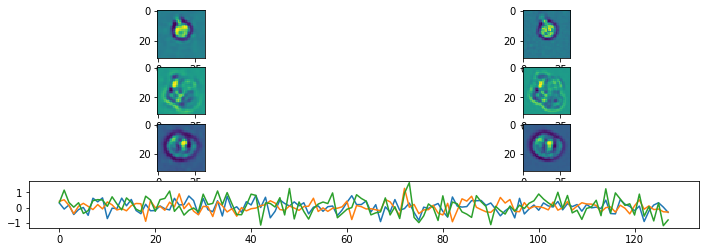

Iteration:  10100 Loss:  655.314
Test Loss 653.1842
Iteration:  10200 Loss:  654.82666
Test Loss 653.182
Iteration:  10300 Loss:  649.7909
Test Loss 653.20135
Iteration:  10400 Loss:  654.0891
Test Loss 653.1413
Iteration:  10500 Loss:  648.2472
Test Loss 653.2184
Iteration:  10600 Loss:  649.7156
Test Loss 653.16
Iteration:  10700 Loss:  649.8634
Test Loss 653.095
Iteration:  10800 Loss:  656.104
Test Loss 653.1123
Iteration:  10900 Loss:  652.03455
Test Loss 653.10016
Iteration:  11000 Loss:  651.8298
Test Loss 653.0984
Iteration:  11000 Loss:  651.8298
Test Loss 653.0984


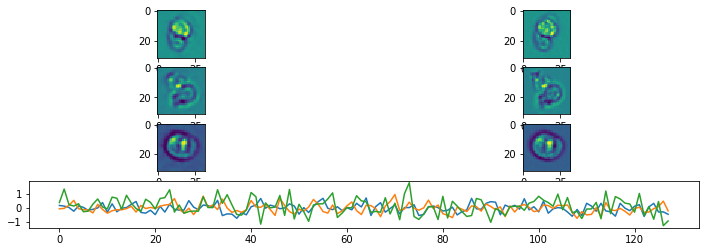

Iteration:  11100 Loss:  654.44196
Test Loss 653.0725
Iteration:  11200 Loss:  653.56616
Test Loss 653.0436
Iteration:  11300 Loss:  646.8004
Test Loss 653.0637
Iteration:  11400 Loss:  656.77924
Test Loss 653.0633
Iteration:  11500 Loss:  652.2899
Test Loss 653.0209
Iteration:  11600 Loss:  646.88
Test Loss 653.14374
Iteration:  11700 Loss:  651.12555
Test Loss 653.01544
Iteration:  11800 Loss:  648.6055
Test Loss 653.0114
Iteration:  11900 Loss:  649.8325
Test Loss 653.0684
Iteration:  12000 Loss:  651.53845
Test Loss 652.97974
Iteration:  12000 Loss:  651.53845
Test Loss 652.97974


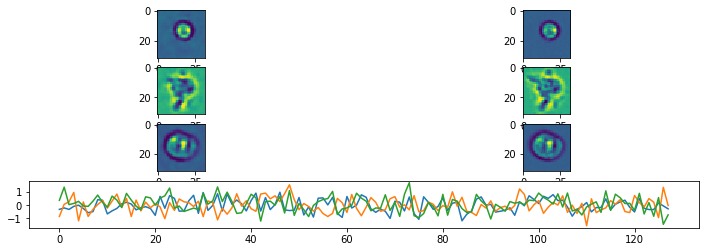

Iteration:  12100 Loss:  646.45264
Test Loss 652.99615
Iteration:  12200 Loss:  654.56726
Test Loss 652.9975
Iteration:  12300 Loss:  650.0068
Test Loss 652.9552
Iteration:  12400 Loss:  649.5698
Test Loss 652.91943
Iteration:  12500 Loss:  651.6593
Test Loss 652.9238
Iteration:  12600 Loss:  650.94617
Test Loss 652.93396
Iteration:  12700 Loss:  645.74084
Test Loss 652.9686
Iteration:  12800 Loss:  652.6556
Test Loss 652.91486
Iteration:  12900 Loss:  649.6726
Test Loss 652.9326
Iteration:  13000 Loss:  654.6807
Test Loss 652.9033
Iteration:  13000 Loss:  654.6807
Test Loss 652.9033


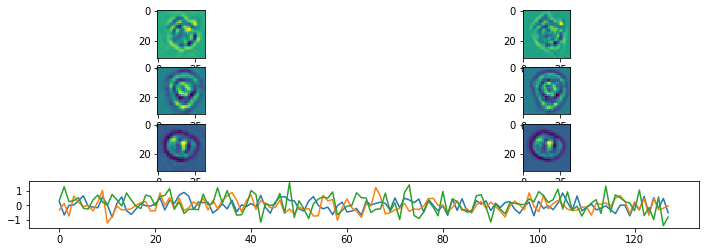

Iteration:  13100 Loss:  656.5041
Test Loss 652.8905
Iteration:  13200 Loss:  655.4817
Test Loss 652.93823
Iteration:  13300 Loss:  652.2873
Test Loss 653.0364
Iteration:  13400 Loss:  650.4972
Test Loss 652.8916
Iteration:  13500 Loss:  654.3121
Test Loss 652.87585
Iteration:  13600 Loss:  656.7428
Test Loss 652.8797
Iteration:  13700 Loss:  646.5431
Test Loss 652.85583
Iteration:  13800 Loss:  646.0393
Test Loss 652.84436
Iteration:  13900 Loss:  655.0051
Test Loss 652.8936
Iteration:  14000 Loss:  652.90674
Test Loss 652.834
Iteration:  14000 Loss:  652.90674
Test Loss 652.834


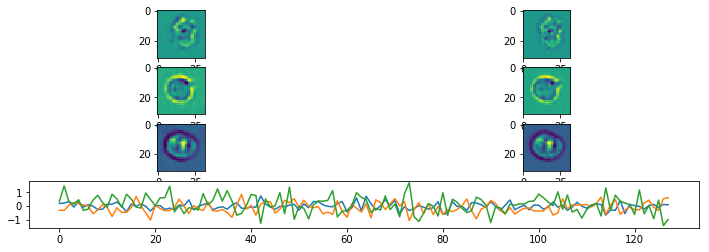

Iteration:  14100 Loss:  648.78906
Test Loss 652.8428
Iteration:  14200 Loss:  651.35614
Test Loss 652.83826
Iteration:  14300 Loss:  653.292
Test Loss 652.82697
Iteration:  14400 Loss:  656.303
Test Loss 652.82166
Iteration:  14500 Loss:  648.5959
Test Loss 652.818
Iteration:  14600 Loss:  649.87427
Test Loss 652.8269
Iteration:  14700 Loss:  651.8674
Test Loss 652.81
Iteration:  14800 Loss:  652.0829
Test Loss 652.83734
Iteration:  14900 Loss:  649.92786
Test Loss 652.7786
Iteration:  15000 Loss:  653.6423
Test Loss 652.7891
Iteration:  15000 Loss:  653.6423
Test Loss 652.7891


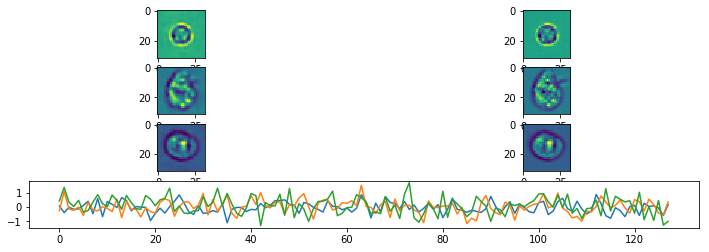

Iteration:  15100 Loss:  655.02576
Test Loss 652.7526
Iteration:  15200 Loss:  655.43866
Test Loss 652.84467
Iteration:  15300 Loss:  655.68207
Test Loss 652.76587
Iteration:  15400 Loss:  650.751
Test Loss 652.7902
Iteration:  15500 Loss:  653.1256
Test Loss 652.77234
Iteration:  15600 Loss:  655.4663
Test Loss 652.83044
Iteration:  15700 Loss:  651.3561
Test Loss 652.7954
Iteration:  15800 Loss:  651.8622
Test Loss 652.74866
Iteration:  15900 Loss:  655.661
Test Loss 652.73206
Iteration:  16000 Loss:  655.4516
Test Loss 652.6964
Iteration:  16000 Loss:  655.4516
Test Loss 652.6964


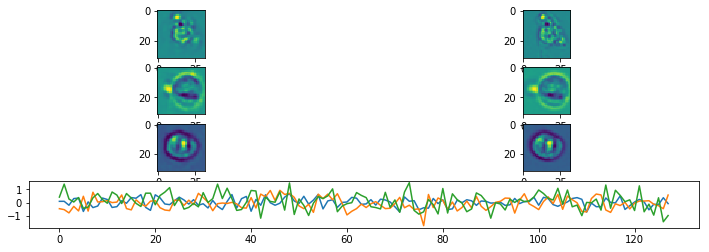

Iteration:  16100 Loss:  650.3281
Test Loss 652.75714
Iteration:  16200 Loss:  650.9322
Test Loss 652.7123
Iteration:  16300 Loss:  659.56854
Test Loss 652.70306
Iteration:  16400 Loss:  652.55
Test Loss 652.7463
Iteration:  16500 Loss:  656.51556
Test Loss 653.04724
Iteration:  16600 Loss:  654.14417
Test Loss 652.7538
Iteration:  16700 Loss:  645.6389
Test Loss 652.72375
Iteration:  16800 Loss:  650.2898
Test Loss 652.8637
Iteration:  16900 Loss:  649.97656
Test Loss 652.6912
Iteration:  17000 Loss:  652.6874
Test Loss 652.6787
Iteration:  17000 Loss:  652.6874
Test Loss 652.6787


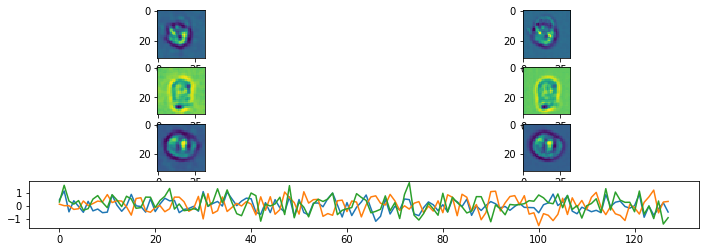

Iteration:  17100 Loss:  648.16223
Test Loss 652.6707
Iteration:  17200 Loss:  657.2357
Test Loss 652.7183
Iteration:  17300 Loss:  653.0825
Test Loss 652.7532
Iteration:  17400 Loss:  655.8819
Test Loss 652.7019
Iteration:  17500 Loss:  646.8586
Test Loss 652.72284
Iteration:  17600 Loss:  653.0789
Test Loss 652.66626
Iteration:  17700 Loss:  652.4608
Test Loss 652.6546
Iteration:  17800 Loss:  655.01874
Test Loss 652.66614
Iteration:  17900 Loss:  652.41583
Test Loss 652.67725
Iteration:  18000 Loss:  649.55365
Test Loss 652.6824
Iteration:  18000 Loss:  649.55365
Test Loss 652.6824


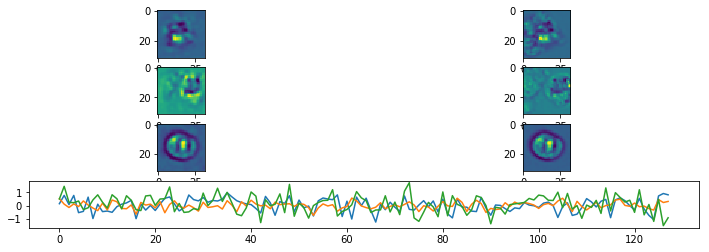

Iteration:  18100 Loss:  657.5036
Test Loss 652.66675
Iteration:  18200 Loss:  649.53314
Test Loss 652.6627
Iteration:  18300 Loss:  652.6333
Test Loss 652.6172
Iteration:  18400 Loss:  649.69684
Test Loss 652.67194
Iteration:  18500 Loss:  650.9436
Test Loss 652.64075
Iteration:  18600 Loss:  648.86414
Test Loss 652.6354
Iteration:  18700 Loss:  645.1179
Test Loss 652.6987
Iteration:  18800 Loss:  653.976
Test Loss 652.6518
Iteration:  18900 Loss:  649.6417
Test Loss 652.6529
Iteration:  19000 Loss:  650.16327
Test Loss 652.6245
Iteration:  19000 Loss:  650.16327
Test Loss 652.6245


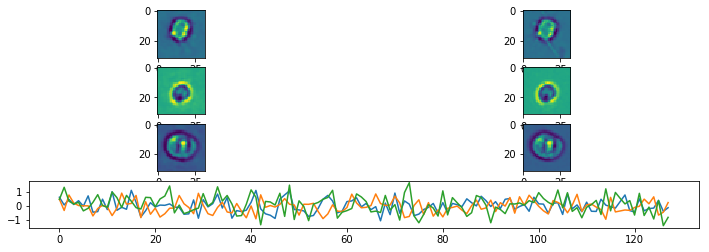

Iteration:  19100 Loss:  650.971
Test Loss 652.64197
Iteration:  19200 Loss:  654.7129
Test Loss 652.6354
Iteration:  19300 Loss:  653.3336
Test Loss 652.80206
Iteration:  19400 Loss:  652.0786
Test Loss 652.60474
Iteration:  19500 Loss:  651.2925
Test Loss 652.6122
Iteration:  19600 Loss:  649.55225
Test Loss 652.643
Iteration:  19700 Loss:  655.214
Test Loss 652.6228
Iteration:  19800 Loss:  653.09735
Test Loss 652.6344
Iteration:  19900 Loss:  656.4
Test Loss 652.62274
Iteration:  20000 Loss:  654.05304
Test Loss 652.59564
Iteration:  20000 Loss:  654.05304
Test Loss 652.59564


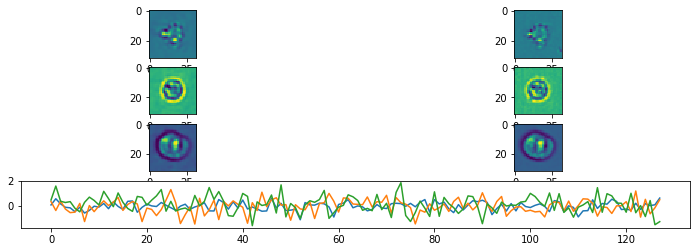

Iteration:  20100 Loss:  656.3198
Test Loss 652.62177
Iteration:  20200 Loss:  650.21655
Test Loss 652.5966
Iteration:  20300 Loss:  650.37866
Test Loss 652.59766
Iteration:  20400 Loss:  655.77234
Test Loss 652.68976
Iteration:  20500 Loss:  652.9315
Test Loss 652.5894
Iteration:  20600 Loss:  652.37744
Test Loss 652.5834
Iteration:  20700 Loss:  657.9376
Test Loss 652.5964
Iteration:  20800 Loss:  644.13446
Test Loss 652.6262
Iteration:  20900 Loss:  655.4919
Test Loss 652.5869
Iteration:  21000 Loss:  649.28357
Test Loss 652.5864
Iteration:  21000 Loss:  649.28357
Test Loss 652.5864


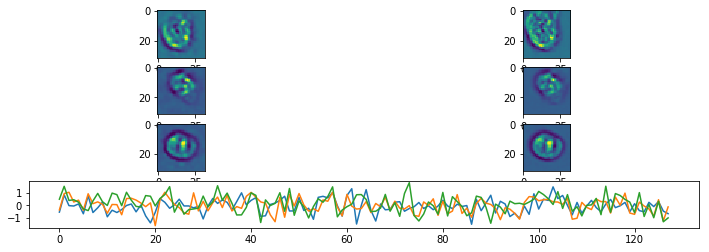

Iteration:  21100 Loss:  650.7182
Test Loss 652.64813
Iteration:  21200 Loss:  652.8301
Test Loss 652.58185
Iteration:  21300 Loss:  651.406
Test Loss 652.5863
Iteration:  21400 Loss:  653.1149
Test Loss 652.60565
Iteration:  21500 Loss:  651.41437
Test Loss 652.55493
Iteration:  21600 Loss:  648.0066
Test Loss 652.56525
Iteration:  21700 Loss:  650.28107
Test Loss 652.5435
Iteration:  21800 Loss:  653.7478
Test Loss 652.59204
Iteration:  21900 Loss:  657.29065
Test Loss 652.5375
Iteration:  22000 Loss:  654.1967
Test Loss 652.5613
Iteration:  22000 Loss:  654.1967
Test Loss 652.5613


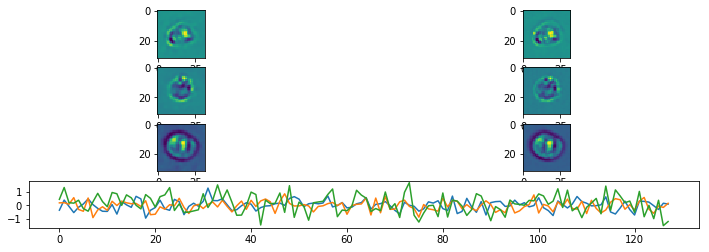

Iteration:  22100 Loss:  651.291
Test Loss 652.61774
Iteration:  22200 Loss:  652.7999
Test Loss 652.57245
Iteration:  22300 Loss:  656.4811
Test Loss 652.5706
Iteration:  22400 Loss:  648.0523
Test Loss 652.5324
Iteration:  22500 Loss:  653.36945
Test Loss 652.64233
Iteration:  22600 Loss:  650.74414
Test Loss 652.5415
Iteration:  22700 Loss:  654.9867
Test Loss 652.5673
Iteration:  22800 Loss:  652.22015
Test Loss 652.5416
Iteration:  22900 Loss:  654.63983
Test Loss 652.54816
Iteration:  23000 Loss:  649.27344
Test Loss 652.5272
Iteration:  23000 Loss:  649.27344
Test Loss 652.5272


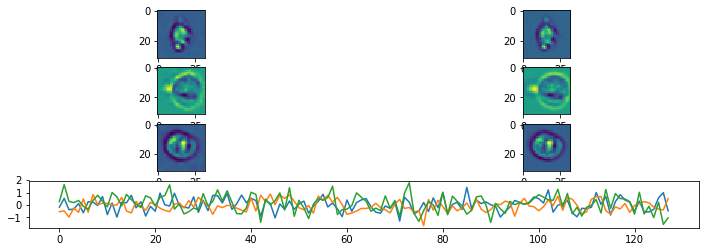

Iteration:  23100 Loss:  653.5373
Test Loss 652.548
Iteration:  23200 Loss:  655.0856
Test Loss 652.5665
Iteration:  23300 Loss:  654.4401
Test Loss 652.6669
Iteration:  23400 Loss:  654.7859
Test Loss 652.5173
Iteration:  23500 Loss:  654.82556
Test Loss 652.53314
Iteration:  23600 Loss:  655.323
Test Loss 652.54785
Iteration:  23700 Loss:  647.87134
Test Loss 652.5146
Iteration:  23800 Loss:  649.3086
Test Loss 652.54047
Iteration:  23900 Loss:  652.3429
Test Loss 652.5158
Iteration:  24000 Loss:  645.1666
Test Loss 652.51117
Iteration:  24000 Loss:  645.1666
Test Loss 652.51117


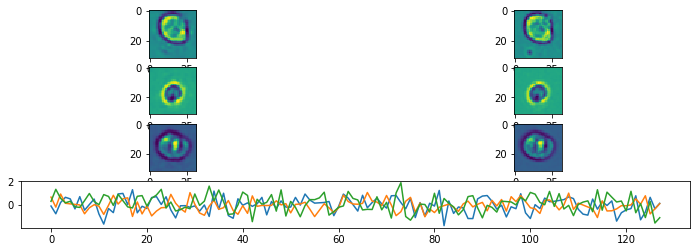

Iteration:  24100 Loss:  649.9741
Test Loss 652.5185
Iteration:  24200 Loss:  654.6509
Test Loss 652.5279
Iteration:  24300 Loss:  649.43005
Test Loss 652.50464
Iteration:  24400 Loss:  651.139
Test Loss 652.5287
Iteration:  24500 Loss:  653.2469
Test Loss 652.5543
Iteration:  24600 Loss:  646.4096
Test Loss 652.5001
Iteration:  24700 Loss:  652.84375
Test Loss 652.5073
Iteration:  24800 Loss:  645.7551
Test Loss 652.5389
Iteration:  24900 Loss:  651.58563
Test Loss 652.51373
Iteration:  25000 Loss:  650.089
Test Loss 652.47064
Iteration:  25000 Loss:  650.089
Test Loss 652.47064


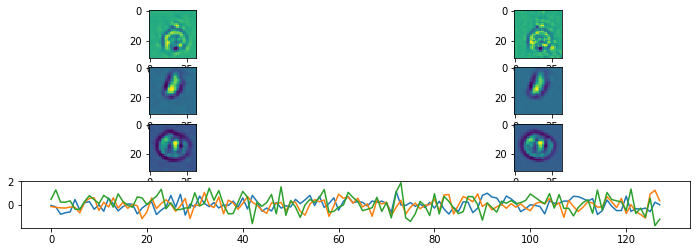

Iteration:  25100 Loss:  649.71545
Test Loss 652.5435
Iteration:  25200 Loss:  650.60754
Test Loss 652.5016
Iteration:  25300 Loss:  655.2196
Test Loss 652.5264
Iteration:  25400 Loss:  644.5709
Test Loss 652.50134
Iteration:  25500 Loss:  654.71906
Test Loss 652.51324
Iteration:  25600 Loss:  653.49176
Test Loss 652.5192
Iteration:  25700 Loss:  651.8105
Test Loss 652.4945
Iteration:  25800 Loss:  648.32733
Test Loss 652.5435
Iteration:  25900 Loss:  652.2993
Test Loss 652.5048
Iteration:  26000 Loss:  656.4335
Test Loss 652.4777
Iteration:  26000 Loss:  656.4335
Test Loss 652.4777


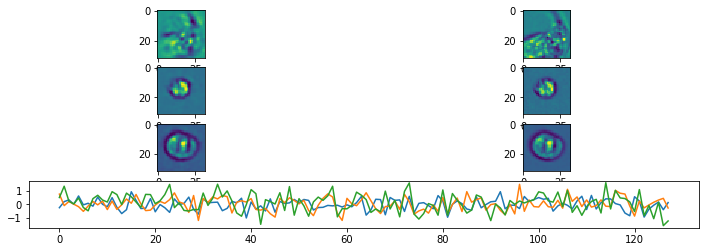

Iteration:  26100 Loss:  649.27734
Test Loss 652.5598
Iteration:  26200 Loss:  651.4513
Test Loss 652.5252
Iteration:  26300 Loss:  649.8522
Test Loss 652.49664
Iteration:  26400 Loss:  654.33105
Test Loss 652.48755
Iteration:  26500 Loss:  647.65857
Test Loss 652.47406
Iteration:  26600 Loss:  656.6781
Test Loss 652.47925
Iteration:  26700 Loss:  650.90826
Test Loss 652.50165
Iteration:  26800 Loss:  654.935
Test Loss 652.4987
Iteration:  26900 Loss:  653.39087
Test Loss 652.6001
Iteration:  27000 Loss:  646.41003
Test Loss 652.4578
Iteration:  27000 Loss:  646.41003
Test Loss 652.4578


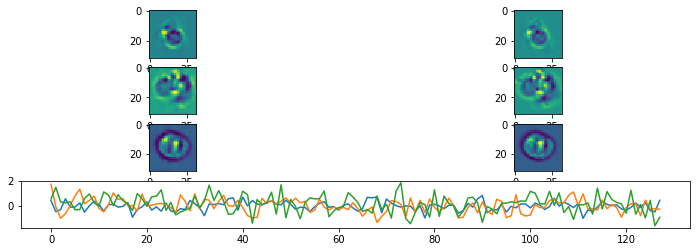

Iteration:  27100 Loss:  647.1428
Test Loss 652.4868
Iteration:  27200 Loss:  653.52356
Test Loss 652.58044
Iteration:  27300 Loss:  649.6556
Test Loss 652.4668
Iteration:  27400 Loss:  646.4501
Test Loss 652.47473
Iteration:  27500 Loss:  651.4486
Test Loss 652.4878
Iteration:  27600 Loss:  647.7116
Test Loss 652.50275
Iteration:  27700 Loss:  649.42523
Test Loss 652.4511
Iteration:  27800 Loss:  660.1311
Test Loss 652.47546
Iteration:  27900 Loss:  651.07587
Test Loss 652.464
Iteration:  28000 Loss:  647.3437
Test Loss 652.44604
Iteration:  28000 Loss:  647.3437
Test Loss 652.44604


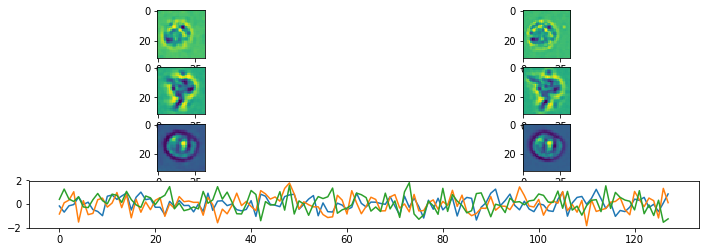

Iteration:  28100 Loss:  647.8254
Test Loss 652.4467
Iteration:  28200 Loss:  651.115
Test Loss 652.5048
Iteration:  28300 Loss:  651.823
Test Loss 652.4242
Iteration:  28400 Loss:  654.98
Test Loss 652.46216
Iteration:  28500 Loss:  653.9866
Test Loss 652.4285
Iteration:  28600 Loss:  653.4401
Test Loss 652.4662
Iteration:  28700 Loss:  656.9729
Test Loss 652.4175
Iteration:  28800 Loss:  646.29755
Test Loss 652.42914
Iteration:  28900 Loss:  652.83105
Test Loss 652.45416
Iteration:  29000 Loss:  649.5067
Test Loss 652.4153
Iteration:  29000 Loss:  649.5067
Test Loss 652.4153


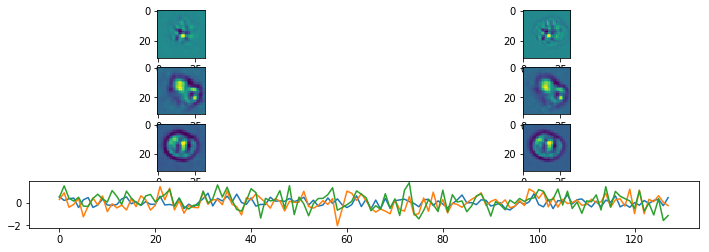

Iteration:  29100 Loss:  650.9203
Test Loss 652.6427
Iteration:  29200 Loss:  659.7571
Test Loss 652.4468
Iteration:  29300 Loss:  653.1301
Test Loss 652.44727
Iteration:  29400 Loss:  655.70593
Test Loss 652.428
Iteration:  29500 Loss:  656.596
Test Loss 652.51587
Iteration:  29600 Loss:  647.3909
Test Loss 652.4626
Iteration:  29700 Loss:  654.87805
Test Loss 652.43054
Iteration:  29800 Loss:  647.8512
Test Loss 652.42535
Iteration:  29900 Loss:  651.46716
Test Loss 652.45465
Iteration:  30000 Loss:  652.67633
Test Loss 652.468
Iteration:  30000 Loss:  652.67633
Test Loss 652.468


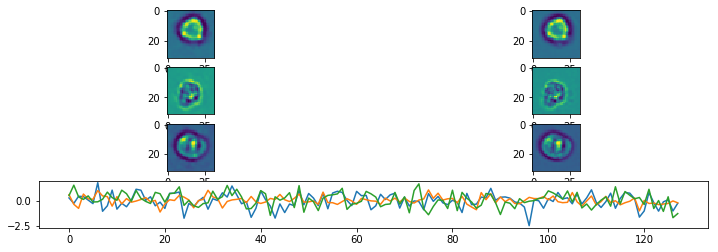

Iteration:  30100 Loss:  649.47534
Test Loss 652.4364
Iteration:  30200 Loss:  652.47205
Test Loss 652.4539
Iteration:  30300 Loss:  654.03894
Test Loss 652.44403
Iteration:  30400 Loss:  653.2753
Test Loss 652.3937
Iteration:  30500 Loss:  648.6602
Test Loss 652.4329
Iteration:  30600 Loss:  652.3092
Test Loss 652.4094
Iteration:  30700 Loss:  651.6201
Test Loss 652.4388
Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 1
p_channels = [0]
p_nepochs = 240
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 128 #128 + 64
p_droprate = 0.75
p_stdev = .04
p_slam = .000
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-12-31-Snail_rop_bf_ce"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 1000, cpdir, tloss=.0001)

In [5]:
x = 4
x

4